# Análisis Humedad Antecedente

Este código pretende realizar los cálculos de análisis de los eventos ubicados entre el 2013 y el 2016 en la estación de **Aula Ambiental**, se pretende establecer lo siguiente:

1. Relación entre caudal y lluvia para los diferentes eventos.
2. Identificación de eventos de hidrógrafa dentro del periodo seleccionado.
3. Identificar mediante correlaciones cual es la memoria de la cuenca asociada a los eventos evaluados.
4. Calibrar el modelo hidrológico para los eventos seleccionados.
5. Analizar la afectación que presenta la memoria de la cuenca sobre los eventos seleccionados.

In [2]:
%matplotlib inline 
import pandas as pd 
import pylab as pl 
import numpy as np 
import datetime 
from wmf import wmf

In [3]:
def FindMax(Q,fechas,umbral,horasAtras=12,BusquedaAdelante=36):
    pos=np.where(Q>umbral)[0]
    grupos=[];g=[];Qmax=[]
    #Encuentra el maximo de cada grupo
    for pant,pnext in zip(pos[:-1],pos[1:]):        
        if pant+1>=pnext and pant+BusquedaAdelante>=pnext:
            g.append(pant)
        else:
            if len(g)>0:
                PosMaxGrupo=np.argmax(Q[g])
                grupos.append(g[PosMaxGrupo])
                Qmax.append(np.max(Q[g]))
            g=[]
    #Pule el maximo por si hay noData
    for c,g in enumerate(grupos):
        if Q.mask[g-1]:
            grupos.pop(c)
    #Obtiene las fechas 12 horas atras 
    if type(fechas)==list:
        fechas=np.array(fechas)
    FechasAtras=fechas[grupos]-datetime.timedelta(hours=horasAtras)
    fechas=list(fechas)     
    posAtras=[fechas.index(i) for i in FechasAtras]
    return grupos,np.array(Qmax)

## 1. Análisis Relación Caudal Vs Lluvia por Eventos 

Se realiza la lectura de las series obtenidas de caudal en la estación de Aula abiental y se lee la lluvia promedio sobre la cuenca del Valle de Aburrá para los eventos.

In [ ]:
Rain2014 = wmf.read_mean_rain('/media/nicolas/Home/nicolas/01_SIATA/bin_rain/3Aguas/Campo_3Aguas_20160101-20161231-300s.hdr')
Rain2013 = wmf.read_mean_rain('/media/nicolas/Home/nicolas/01_SIATA/bin_rain/Aula30m/Campo_20140101-20141231_300seg.hdr')

In [6]:
Q = pd.read_msgpack('/media/nicolas/Home/Jupyter/Nicolas/Trabajo/02_series/Q3Aguas-20140101-20170331.msg')
Rain = pd.read_msgpack('/media/nicolas/Home/Jupyter/Nicolas/Trabajo/02_series/Rain-300s-20121201-20161231.msg')

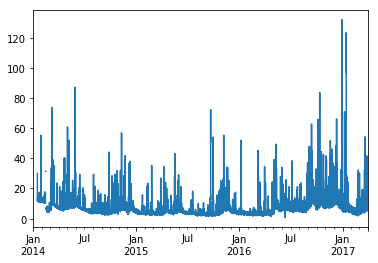

In [7]:
Q.plot()

Se encuentran los eventos en donde se alcanza un caudal igual o mayor a **50** 

In [9]:
#Busqueda de maximos 
Qma = np.ma.array(Q.values, mask=Q.values > 1500)
G, Qmax = FindMax(Qma, Q.index.to_pydatetime(), 15, BusquedaAdelante=36)
#Maximos establecidos como series de pandas
Gs = pd.Series(Qma[G], index=Q.index[G])

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in greater
  from ipykernel import kernelapp as app


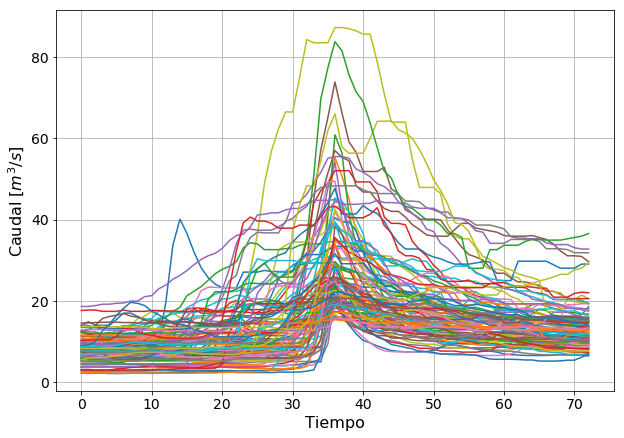

In [10]:
tm = pd.Timedelta('3 hours')
tm2 = pd.Timedelta('24 hours')
c = 0
fig = pl.figure(figsize=(10,7))
ax = fig.add_subplot(111)
Matriz = []
Pos = []
for p,i in enumerate(Gs.index):
    if Q[i - tm: i + tm].values.argmax() == 36 and Rain[i-tm:i].sum() > 1.0 and Rain[i-tm2:i].sum() < 20:
        ax.plot(Q[i - tm: i + tm].values)
        Matriz.append(Q[i - tm: i + tm].values)
        c+=1
        Pos.append(p)
pl.grid()
pl.xlabel('Tiempo', size = 16)
pl.ylabel('Caudal [$m^3/s$]', size = 16)
ax.tick_params(labelsize = 14)
GsCut = Gs[Pos]

**Figura**: Eventos Seleccionados, donde se cumple que: El caudal es mayor a 50m3 y la lluvia acumulada es mayor a 1mm.

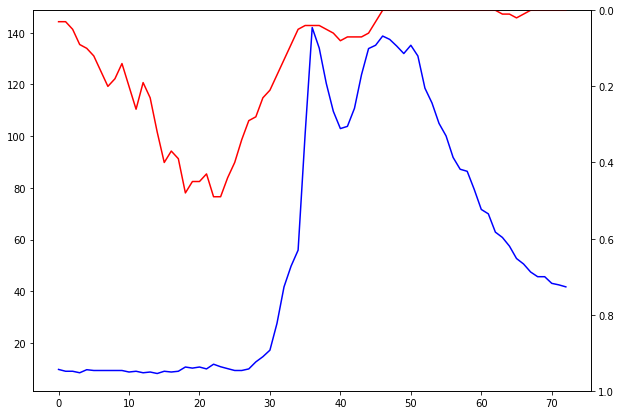

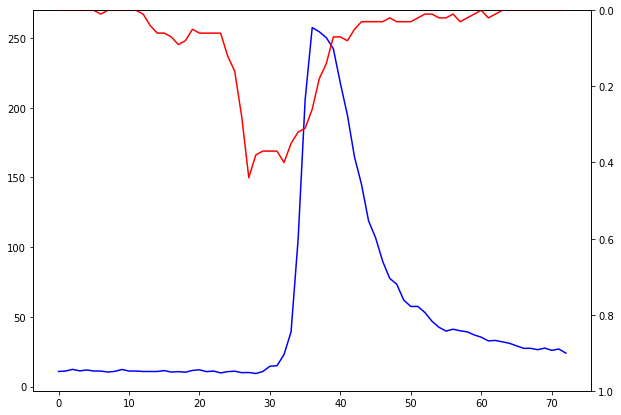

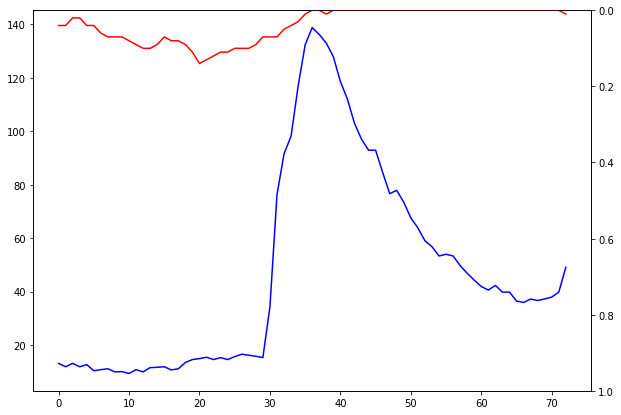

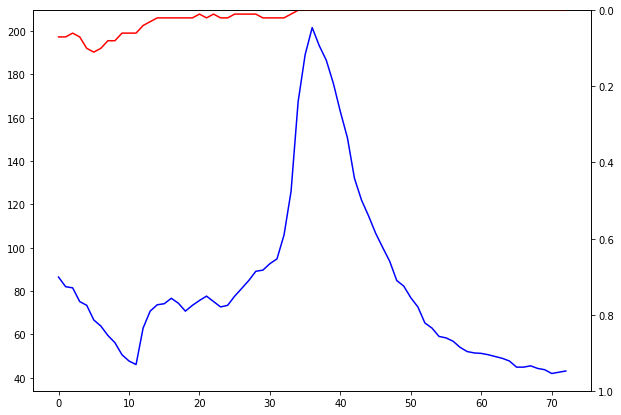

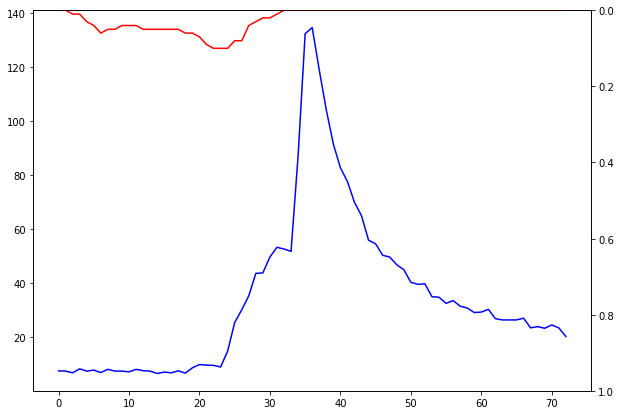

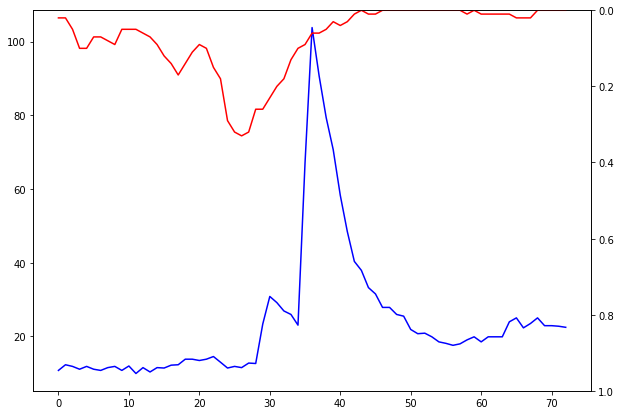

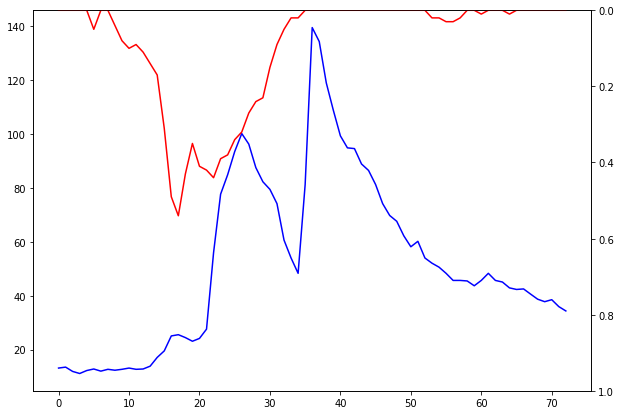

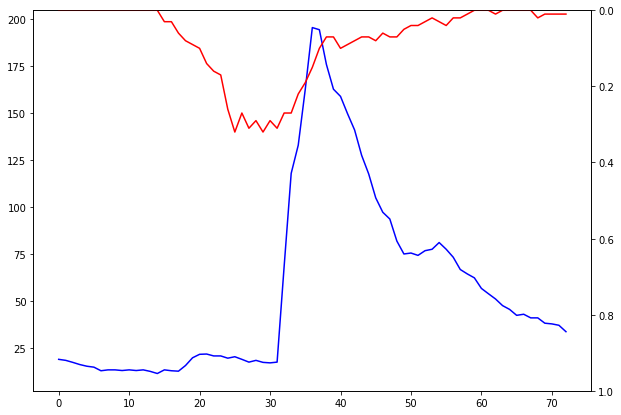

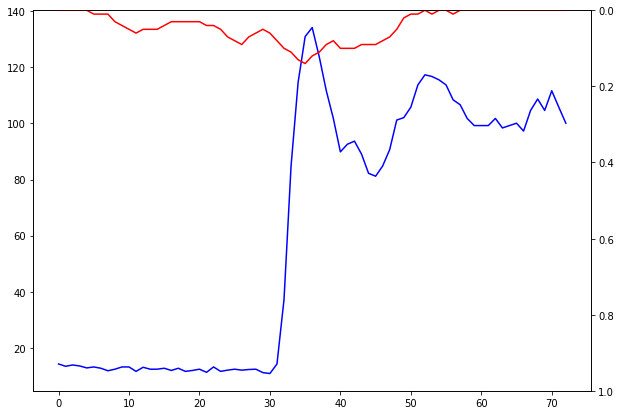

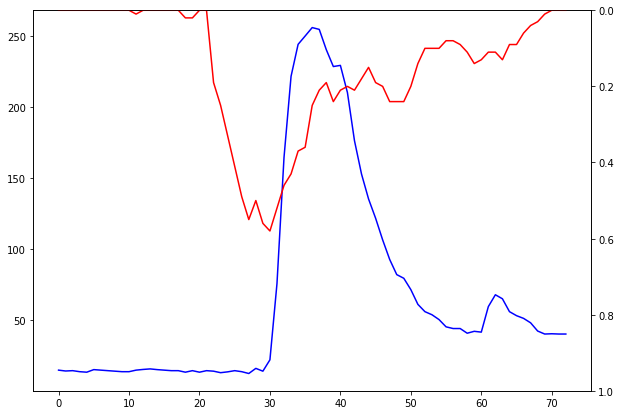

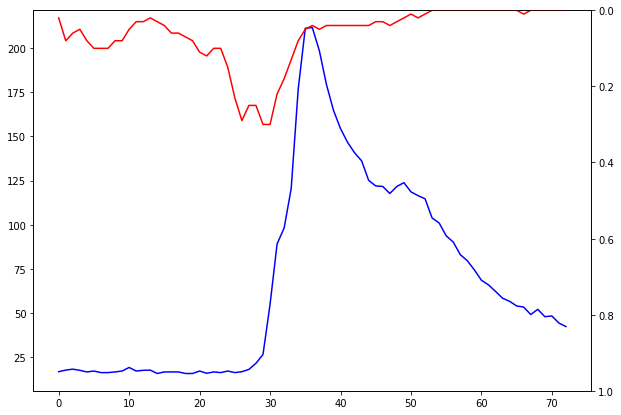

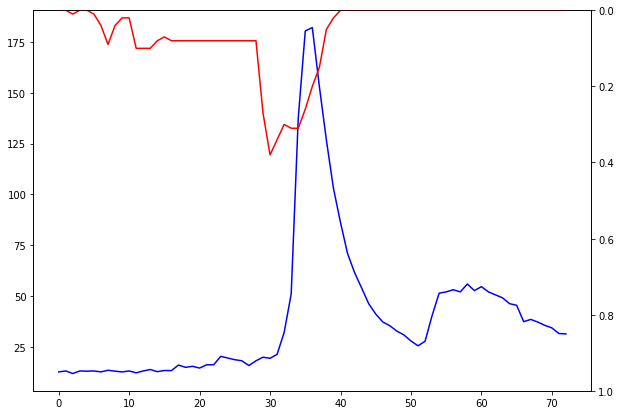

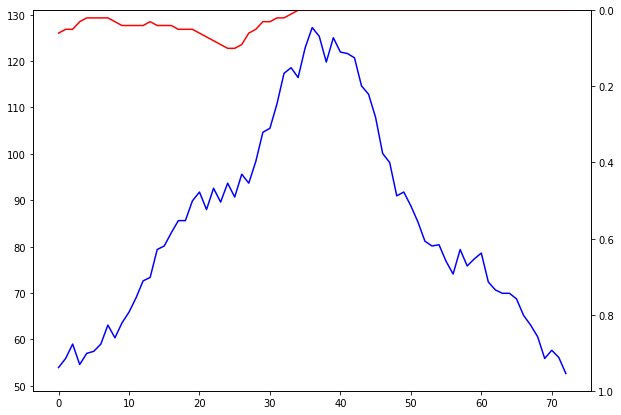

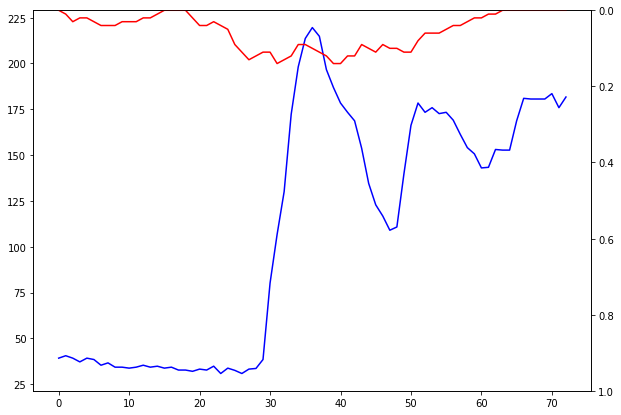

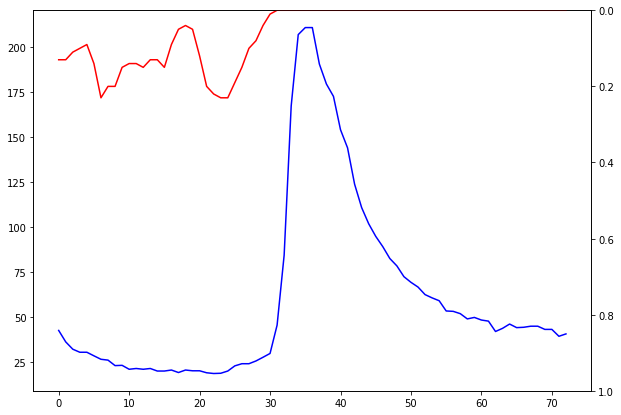

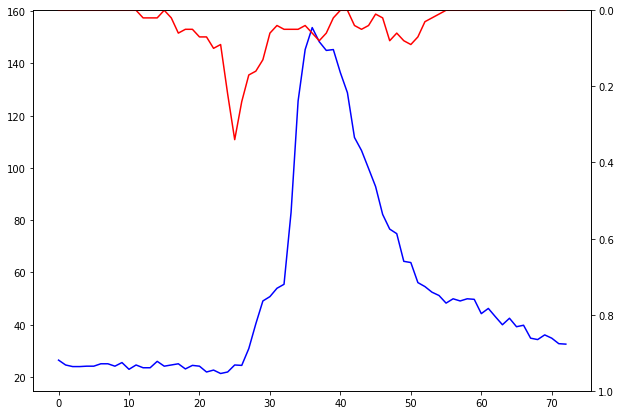

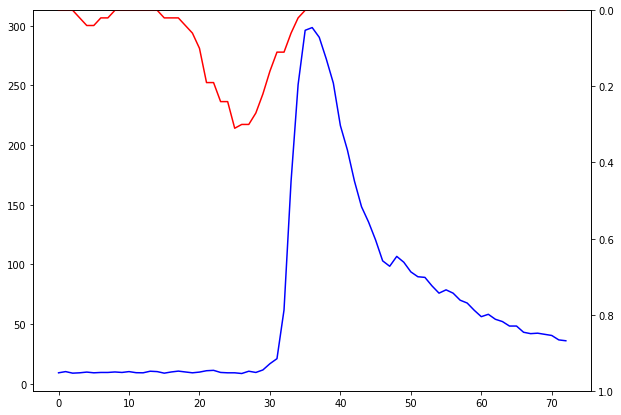

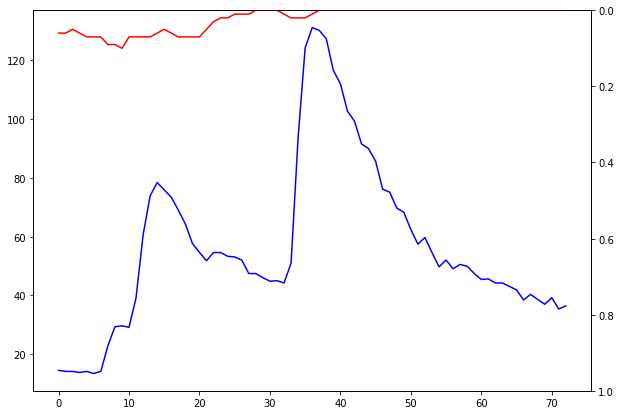

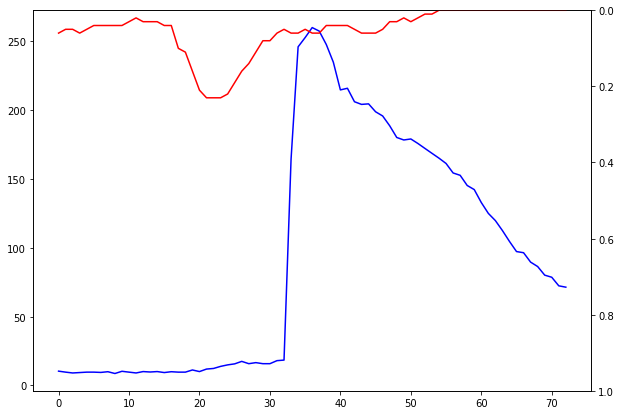

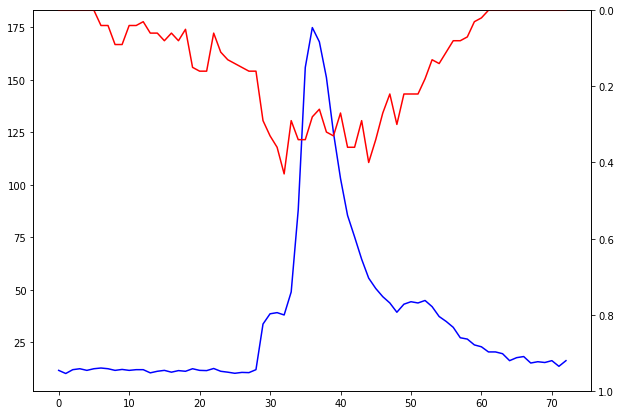

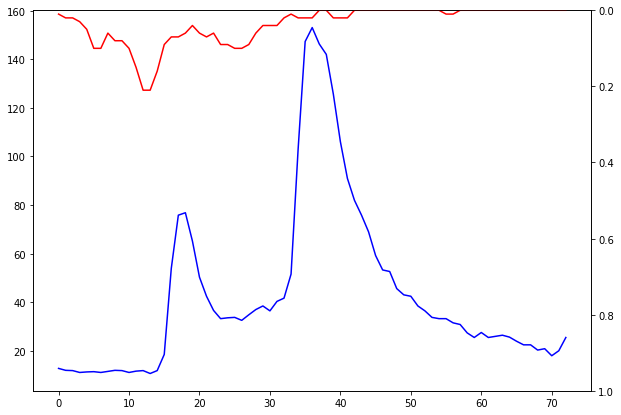

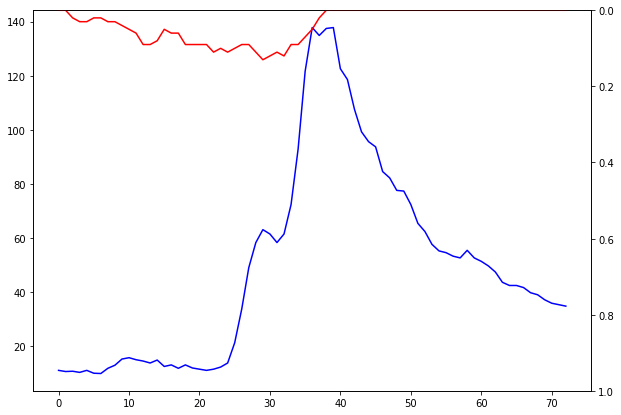

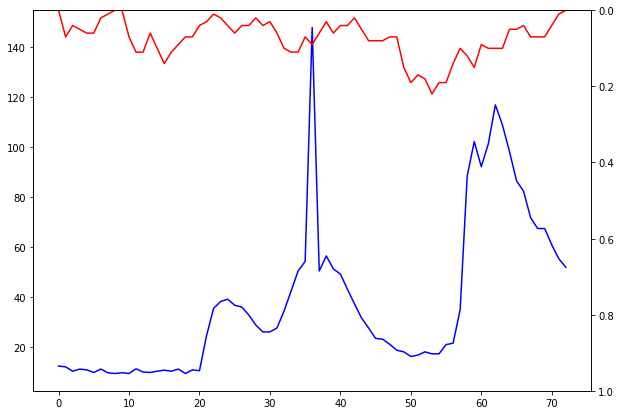

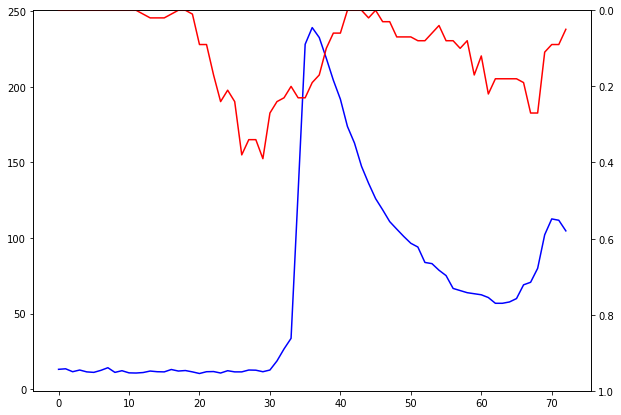

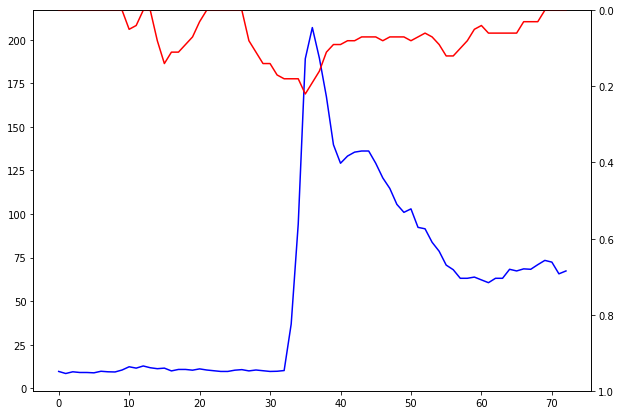

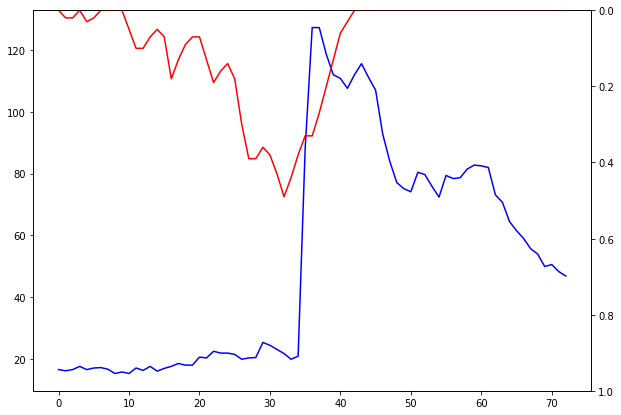

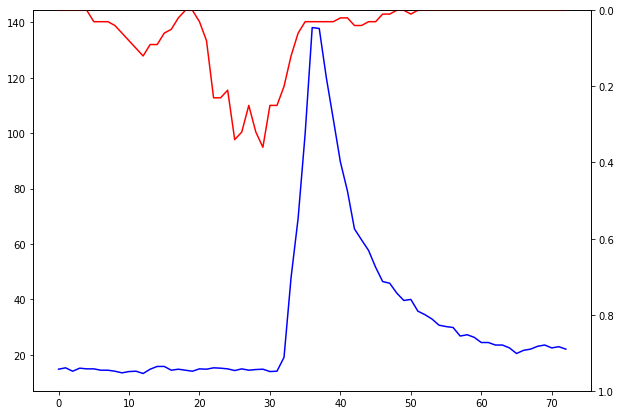

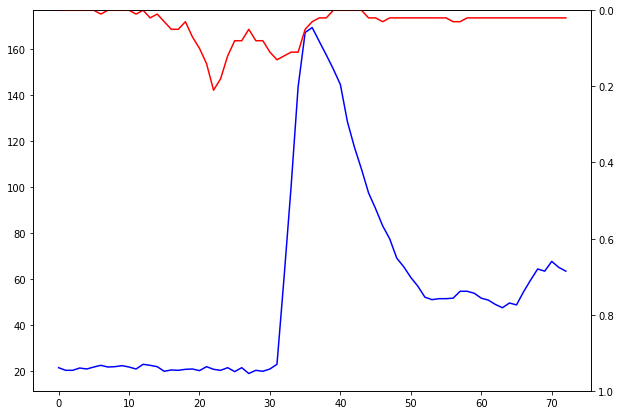

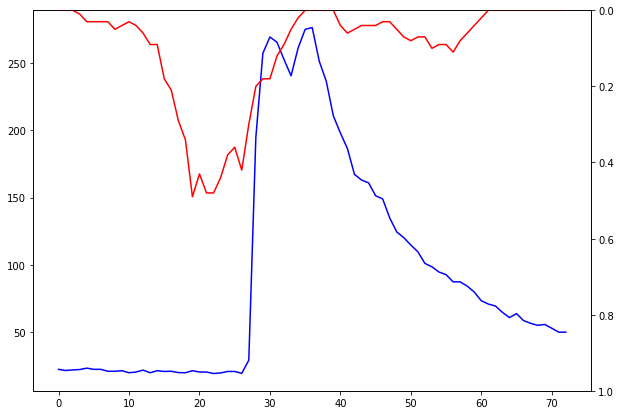

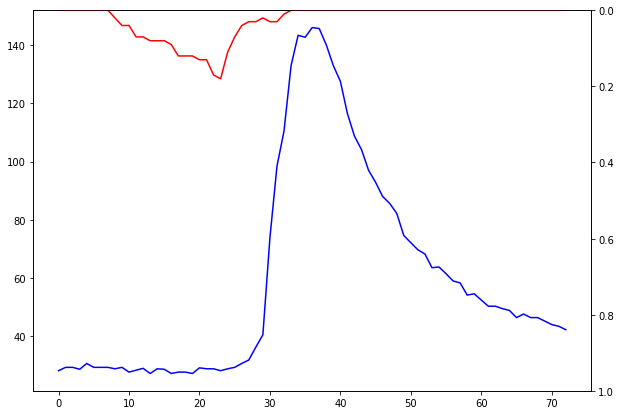

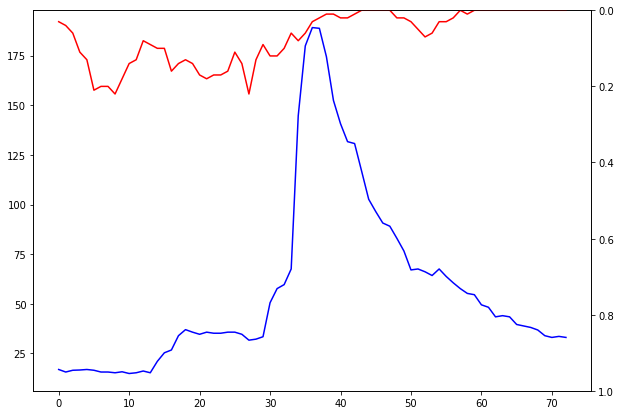

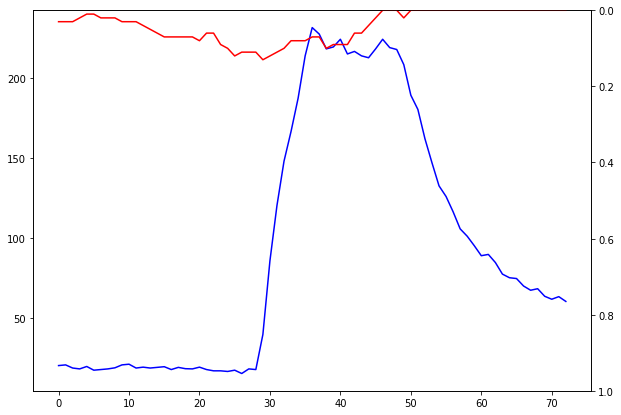

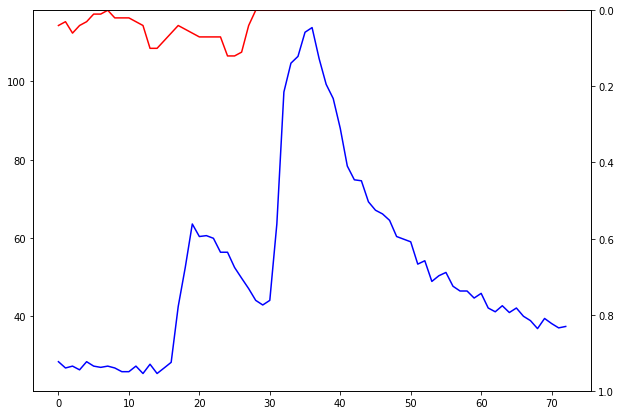

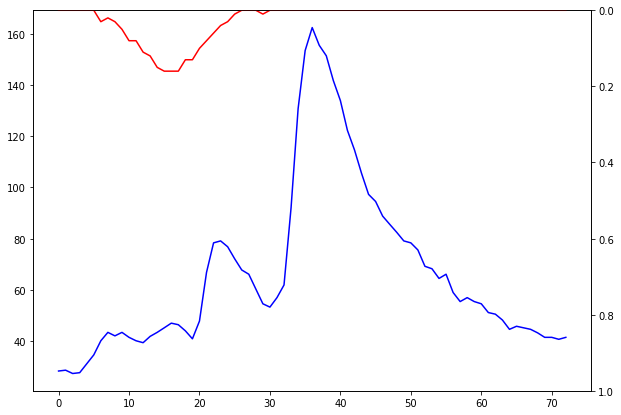

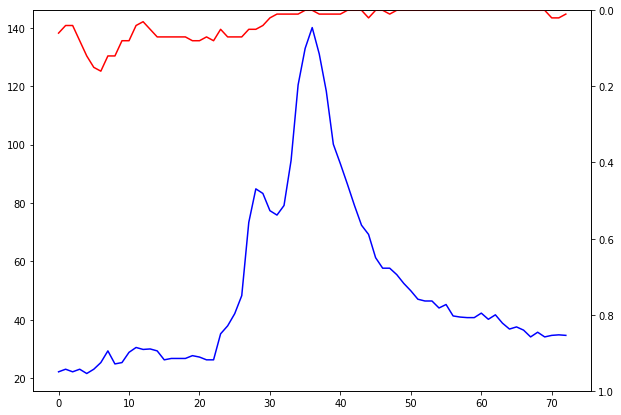

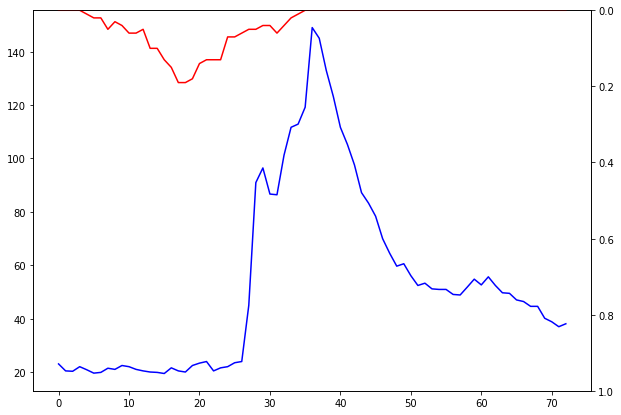

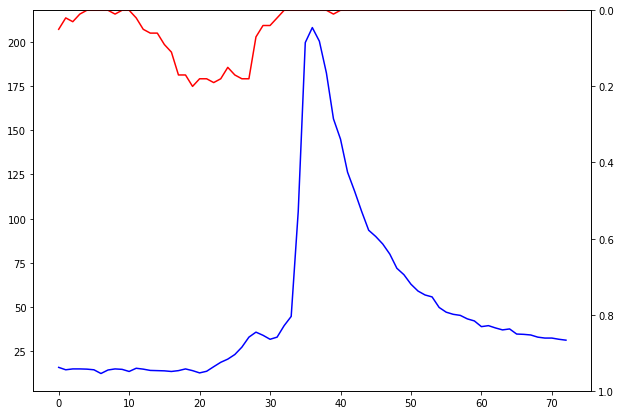

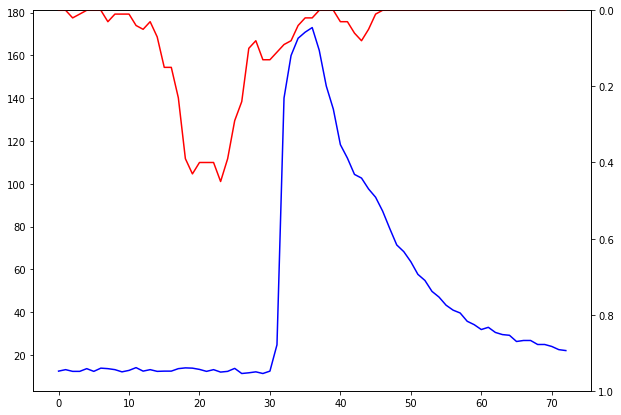

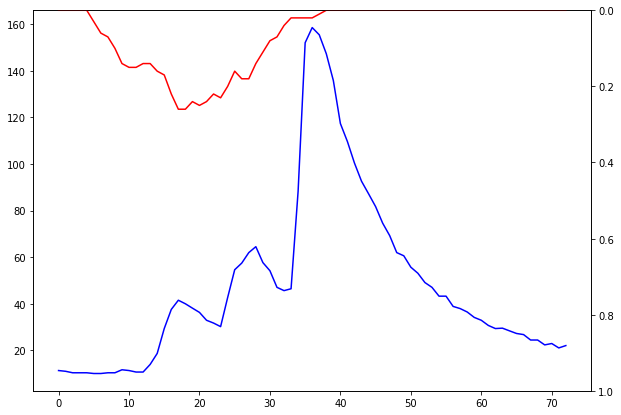

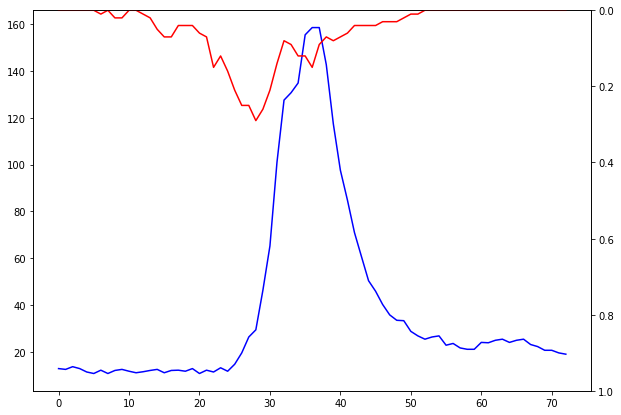

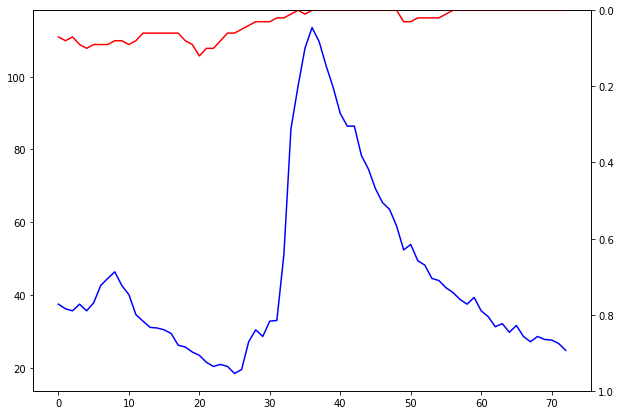

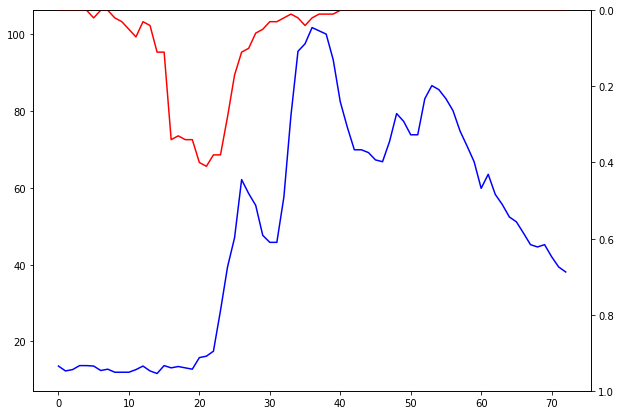

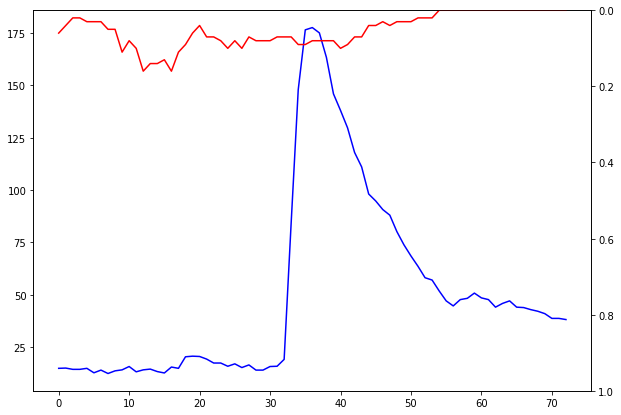

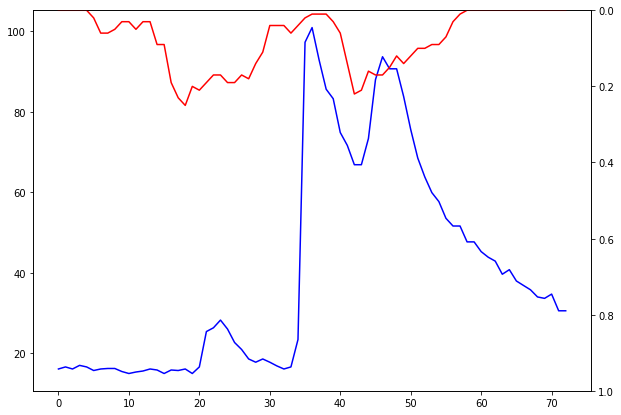

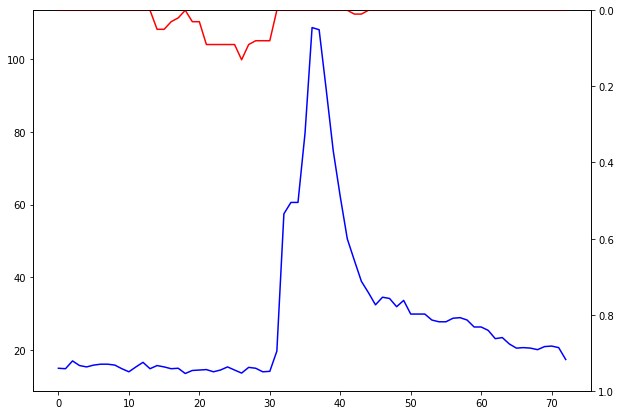

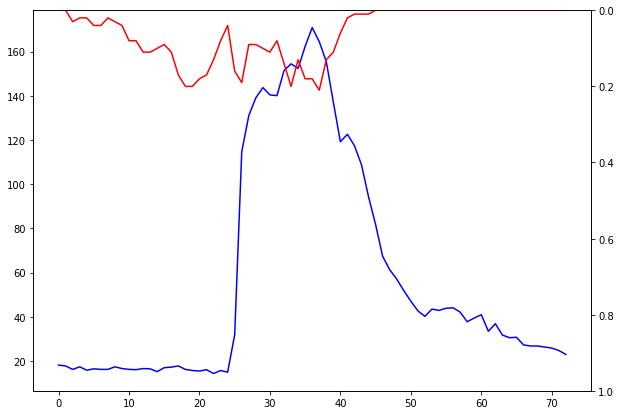

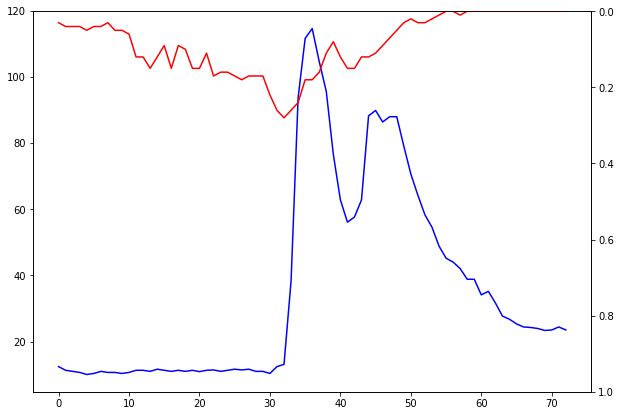

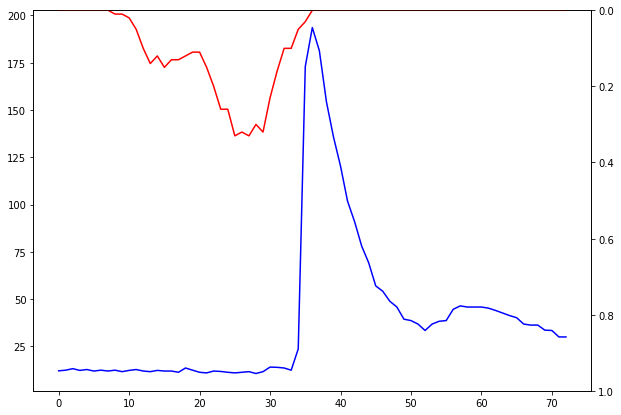

In [143]:
for i in GsCut.index[:100]:
    if Q[i-tm:i+tm].max()>100 and Q[i-tm:i+tm].max()<300:
        fig = pl.figure(figsize=(10,7))
        ax = fig.add_subplot(111)
        #ax2AX=pl.gca()
        ax2 = ax.twinx()
        ax2.set_ylim(ax2.get_ylim()[::-1])
        ax.plot(Q[i-tm:i+tm].values, 'b')
        ax2.plot(Rain[i-tm:i+tm].values, 'r')

**Figuras**: Figuras de las relaciones entre el caudal observado en aula ambiental y la lluvia que ocurre en la cuenca, estas son las figuras resultado para los 149 eventos seleccionados.

Ahora se van a sacar datos sobre la lluvia y el caudal en cada uno de los eventos.

In [138]:
tm = pd.Timedelta('3 hours')
tm2 = pd.Timedelta('24 hours')

DQ = {'max':[],'vol':[]}
DR = {'max':[],'tot':[],'ante':[]}

for i in GsCut.index:
    #Propiedades del cadual
    DQ['max'].append(Q[i-tm:i+tm].max())
    #Propiedades de la lluvia 
    DR['max'].append(Rain[i-tm:i].max())
    DR['tot'].append(Rain[i-tm:i].sum())
    DR['ante'].append(Rain[i-tm2:i].sum())

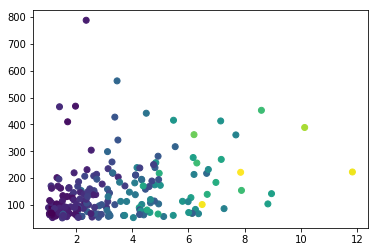

In [140]:
pl.scatter(DR['tot'],DQ['max'], c = DR['max'])
#pl.xlim(0,15)

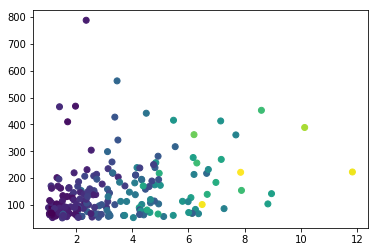

In [137]:
pl.scatter(DR['tot'],DQ['max'], c = DR['max'])
#pl.xlim(0,15)